In [11]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict,Annotated
from dotenv import load_dotenv
from pydantic import BaseModel,Field
import operator

In [5]:
load_dotenv()

True

In [12]:
model=ChatGoogleGenerativeAI(model='gemini-2.0-flash-lite')

In [13]:
class EvaluationSchema(BaseModel):
    feedback:str=Field(description="detailed feedback for the essay")
    score:int=Field(description="Score this out of 10")

In [14]:
Str_model=model.with_structured_output(EvaluationSchema)

In [15]:
essay=f"""Climate Change and India's Sustainable Development

Climate change represents one of the most pressing challenges facing humanity in the twenty-first century today. India, as a developing nation with a vast population, faces unique vulnerabilities to climate change impacts. Rising temperatures, erratic monsoons, and extreme weather events threaten India's agricultural productivity and food security significantly. The country's dependence on monsoon rainfall makes it particularly susceptible to climate variability and change patterns.

India has emerged as a global leader in renewable energy adoption, demonstrating commitment to sustainable development. The International Solar Alliance, initiated by India, showcases its dedication to promoting clean energy solutions worldwide. India's ambitious target of achieving 500 GW of renewable energy capacity by 2030 reflects progressive thinking. However, balancing economic growth with environmental protection remains a complex challenge for policy makers and administrators.

The agricultural sector, employing nearly half of India's workforce, faces severe threats from changing climate patterns. Farmers experience crop failures, reduced yields, and increased pest attacks due to temperature variations and rainfall. Water scarcity is becoming increasingly acute, affecting both agricultural productivity and drinking water availability across regions. Urban areas experience heat islands, air pollution, and inadequate infrastructure to handle climate impacts effectively today.

India's coastal regions, home to millions of people, are threatened by rising sea levels and increasing storms. The Paris Agreement commitments reflect India's responsible approach to global climate action despite limited historical emissions contribution. India has emphasized climate justice, arguing that developed nations should bear greater responsibility for emission reductions. Renewable energy expansion, particularly solar and wind power, has transformed India's energy landscape in recent years.

Forest conservation and afforestation programs play crucial roles in India's climate mitigation strategy and carbon sequestration efforts. The Green India Mission aims to increase forest cover and improve ecosystem services across the country. Climate change adaptation requires significant financial resources, technological innovation, and institutional capacity building at all levels. India needs substantial climate finance from developed countries to implement adaptation and mitigation measures effectively nationwide.

In conclusion, India's approach to climate change must balance development aspirations with environmental sustainability and protection measures. Investing in renewable energy, sustainable agriculture, and climate-resilient infrastructure will determine India's future prosperity and security. Political will, public awareness, and international cooperation are essential for addressing this existential challenge successfully. India's youth must be empowered to drive innovation and sustainable practices for a climate-resilient future. The time for action is now, as delays will only amplify the costs and consequences.
"""

In [16]:
class Upse_review(TypedDict):
    essay:str
    language_feedback:str
    analysis_feedback:str
    clarity_feedback:str
    overall_feedback:str
    Individual_score:Annotated[list[int],operator.add]
    Avg_score:float


In [17]:
def eval_language(state:Upse_review)->Upse_review:
    prompt=f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10\n {state['essay']}'
    output=Str_model.invoke(prompt)
    return {'language_feedback':output.feedback,'Individual_score':[output.score]}

In [18]:
def eval_analysis(state:Upse_review)->Upse_review:
    prompt=f'Evaluate the depth of analysis of the following essay and provide a feedback and assign a score out of 10\n {state['essay']}'
    output=Str_model.invoke(prompt)
    return {'analysis_feedback':output.feedback,'Individual_score':[output.score]}

In [19]:
def eval_thought(state:Upse_review)->Upse_review:
    prompt=f'Evaluate the clarity of thought of the following essay and provide a feedback and assign a score out of 10\n {state['essay']}'
    output=Str_model.invoke(prompt)
    return {'clarity_feedback':output.feedback,'Individual_score':[output.score]}

In [20]:
def eval_final(state:Upse_review)->Upse_review:
    prompt=f'Based on the following feedbacks create a summarized feedback\n language feedback{state['language_feedback']}\nanalysis feedback{state["analysis_feedback"]}\nclarity of thought feedback{state["clarity_feedback"]}'
    output=model.invoke(prompt).content
    avg_score=sum(state['Individual_score'])/len(state['Individual_score'])
    return {'overall_feedback':output,'Avg_score':avg_score}

In [21]:
graph=StateGraph(Upse_review)
graph.add_node("language_review",eval_language)
graph.add_node("evaluate_analysis",eval_analysis)
graph.add_node("evaluate_thought",eval_thought)
graph.add_node("final_evaluation",eval_final)

In [22]:
graph.add_edge(START,'language_review')
graph.add_edge(START,'evaluate_analysis')
graph.add_edge(START,'evaluate_thought')
graph.add_edge('language_review','final_evaluation')
graph.add_edge('evaluate_analysis','final_evaluation')
graph.add_edge('evaluate_thought','final_evaluation')
graph.add_edge('final_evaluation',END)


In [23]:
wf=graph.compile()

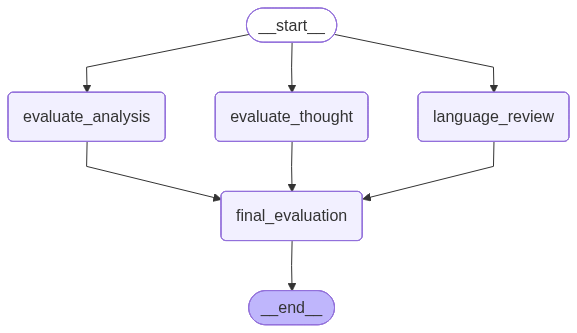

In [24]:
from IPython.display import Image
Image(wf.get_graph().draw_mermaid_png())

In [25]:
inital_state={'essay':essay}
final_state=wf.invoke(inital_state)
print(final_state)


{'essay': "Climate Change and India's Sustainable Development\n\nClimate change represents one of the most pressing challenges facing humanity in the twenty-first century today. India, as a developing nation with a vast population, faces unique vulnerabilities to climate change impacts. Rising temperatures, erratic monsoons, and extreme weather events threaten India's agricultural productivity and food security significantly. The country's dependence on monsoon rainfall makes it particularly susceptible to climate variability and change patterns.\n\nIndia has emerged as a global leader in renewable energy adoption, demonstrating commitment to sustainable development. The International Solar Alliance, initiated by India, showcases its dedication to promoting clean energy solutions worldwide. India's ambitious target of achieving 500 GW of renewable energy capacity by 2030 reflects progressive thinking. However, balancing economic growth with environmental protection remains a complex ch

In [ ]:
{'essay': "Climate Change and India's Sustainable Development\n\nClimate change represents one of the most pressing challenges facing humanity in the twenty-first century today. India, as a developing nation with a vast population, faces unique vulnerabilities to climate change impacts. Rising temperatures, erratic monsoons, and extreme weather events threaten India's agricultural productivity and food security significantly. The country's dependence on monsoon rainfall makes it particularly susceptible to climate variability and change patterns.\n\nIndia has emerged as a global leader in renewable energy adoption, demonstrating commitment to sustainable development. The International Solar Alliance, initiated by India, showcases its dedication to promoting clean energy solutions worldwide. India's ambitious target of achieving 500 GW of renewable energy capacity by 2030 reflects progressive thinking. However, balancing economic growth with environmental protection remains a complex challenge for policy makers and administrators.\n\nThe agricultural sector, employing nearly half of India's workforce, faces severe threats from changing climate patterns. Farmers experience crop failures, reduced yields, and increased pest attacks due to temperature variations and rainfall. Water scarcity is becoming increasingly acute, affecting both agricultural productivity and drinking water availability across regions. Urban areas experience heat islands, air pollution, and inadequate infrastructure to handle climate impacts effectively today.\n\nIndia's coastal regions, home to millions of people, are threatened by rising sea levels and increasing storms. The Paris Agreement commitments reflect India's responsible approach to global climate action despite limited historical emissions contribution. India has emphasized climate justice, arguing that developed nations should bear greater responsibility for emission reductions. Renewable energy expansion, particularly solar and wind power, has transformed India's energy landscape in recent years.\n\nForest conservation and afforestation programs play crucial roles in India's climate mitigation strategy and carbon sequestration efforts. The Green India Mission aims to increase forest cover and improve ecosystem services across the country. Climate change adaptation requires significant financial resources, technological innovation, and institutional capacity building at all levels. India needs substantial climate finance from developed countries to implement adaptation and mitigation measures effectively nationwide.\n\nIn conclusion, India's approach to climate change must balance development aspirations with environmental sustainability and protection measures. Investing in renewable energy, sustainable agriculture, and climate-resilient infrastructure will determine India's future prosperity and security. Political will, public awareness, and international cooperation are essential for addressing this existential challenge successfully. India's youth must be empowered to drive innovation and sustainable practices for a climate-resilient future. The time for action is now, as delays will only amplify the costs and consequences.\n", 'language_feedback': 'The essay effectively addresses the challenges of climate change in India, highlighting vulnerabilities, mitigation strategies, and the need for sustainable development. The structure is logical, and the arguments are well-supported with relevant examples. However, the language could be more varied and precise. Some sentences are repetitive, and the essay could benefit from more in-depth analysis of specific policies and their impact. Overall, it demonstrates a good understanding of the topic.', 'analysis_feedback': "The essay provides a good overview of climate change impacts on India and its sustainable development efforts. It covers various aspects like renewable energy adoption, agricultural challenges, and coastal threats. The analysis could be strengthened by providing specific examples and data to support the claims made. Additionally, exploring the challenges and opportunities in more depth would enhance the essay's depth. Overall, the essay demonstrates a good understanding of the topic.", 'clarity_feedback': 'The essay provides a comprehensive overview of climate change impacts on India and its sustainable development efforts. It effectively highlights the challenges, initiatives, and future strategies. The structure is logical, and the arguments are well-supported with relevant examples. However, the essay could be strengthened by providing more specific data or examples to support some of the claims. The conclusion effectively summarizes the key points and emphasizes the need for immediate action.', 'overall_feedback': 'This essay demonstrates a good understanding of climate change challenges and sustainable development efforts in India, offering a comprehensive overview of the topic. The structure is logical, and arguments are generally well-supported. However, the essay could be improved by:\n\n*   **Strengthening analysis:** Providing more specific data, in-depth analysis of policies, and more concrete examples to support claims.\n*   **Enhancing language:** Varying sentence structure and using more precise language to avoid repetition.\n*   **Deepening exploration:** Delving further into specific challenges, opportunities, and the impacts of various initiatives.', 'Individual_score': [7, 8, 7], 'Avg_score': 7.333333333333333}